# Prediction test

In [1]:
data_dir = "../../../DATA/behavioral_cloning_data/"
image_path = data_dir + "autonomous_run/image_11.352377891540527.jpg"
image_10.86431097984314.jpg

In [2]:
import matplotlib.pyplot as plt
from ImageHelper import preprocessing_pipline
from DataHelper import read_image

Using TensorFlow backend.


In [3]:
from keras.models import load_model
model = load_model('model.h5')

optimizer='sgd' # | 'rmsprop'
loss_function='mean_squared_error' # | 'binary_crossentropy' | 'mse'
metrics_array=['accuracy'] # , mean_pred, false_rates
model.compile(optimizer, loss_function, metrics_array)

(224, 224, 3)


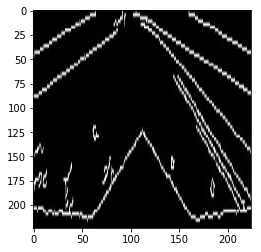

In [4]:
image = read_image(image_path)
print(image.shape)
plt.imshow(image, cmap='gray')
plt.show()
#image = preprocessing_pipline(image, final_size=64, should_plot=False)
#plt.imshow(image, cmap='gray')
#plt.show()

In [5]:
import numpy as np
# expected input_1 to have 4 dimensions, but got array with shape (224, 224, 3)
# expected input_1 to have 4 dimensions, but got array with shape (1, 1, 224, 224, 3)
#image = image[None, :, :, :]
# expected input_1 to have 4 dimensions, but got array with shape (1, 1, 1, 1, 224, 224, 3)
#image = image[None, :, :, :, :]
image = image[None, :, :]


In [18]:
import keras
#from keras.np_utils import probas_to_classes

predictions = model.predict( image, batch_size=1, verbose=1)
print(type(predictions), predictions.shape, predictions)
prediction = float(predictions[0][0])
print(np.argmax(prediction))
print(np.argmax(predictions))

1/1 [==============================] - 0s
<class 'numpy.ndarray'> (1, 21) [[ 0.04037692  0.08625186  0.04070021  0.05003728  0.02632633  0.05093867
   0.03666456  0.05179557  0.04434447  0.04750136  0.03217026  0.05899535
   0.02859388  0.04283846  0.06205743  0.05063206  0.06625616  0.04629806
   0.02867965  0.07900687  0.02953446]]
0
1


In [13]:
from keras.utils.np_utils import probas_to_classes

classes = probas_to_classes(predictions)
print(type(classes), classes.shape, classes[0])

<class 'numpy.ndarray'> (1,) 1


In [11]:
x = model.predict_proba(image)
print(type(x), x.shape, x)

AttributeError: 'Model' object has no attribute 'predict_proba'

In [9]:
classes = model.predict_classes(image)
print(type(classes), classes.shape, classes)

AttributeError: 'Model' object has no attribute 'predict_classes'